In [1]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix
from scipy.fftpack import fft

# BUMP

In [2]:
file_name_bump= "bump1.json"
dataBump = pd.read_json(file_name_bump)
dataBump.head(5)

,acceX,acceX_raw,acceY,acceY_raw,acceZ,acceZ_raw,count,dataType,gpsSpeed,id,imei,journeyID,lat,lon,obdRpm,obdSpeed,time
0,-1.110223e-17,-0.421379,9.854396,10.228029,0.073315,-1.762132,0,data_item,0,d9326939-d68b-45e9-b3d7-aee75434a19f,359988060800748,3.599881e+27,5.957424,80.544351,0,0,1529838281311
1,-4.440892e-17,-0.536301,9.820303,10.093954,0.008965,-1.197101,0,data_item,0,4acacb8d-300e-4873-915c-6fb9ed7fddba,359988060800748,3.599881e+27,5.957424,80.544351,0,0,1529838281438
2,1.665335e-17,-0.373495,9.837924,10.333375,0.103526,-0.938527,0,data_item,0,ceeff057-bd74-4203-992b-9277d07ded01,359988060800748,3.599881e+27,5.957424,80.544351,0,0,1529838281502
3,3.885781e-17,0.660800,9.690441,9.672575,-0.043706,-1.053449,0,data_item,0,2c488a80-f052-4819-8e57-1da34133de1c,359988060800748,3.599881e+27,5.957424,80.544351,0,0,1529838281609
4,0.000000e+00,0.344765,9.784677,10.189722,0.044520,-1.015141,0,data_item,0,dd5d3147-3294-4dd5-9687-8872c0dca674,359988060800748,3.599881e+27,5.957424,80.544351,0,0,1529838281702


In [3]:
dataBump.shape

(319, 17)

Text(0.5,1,'Reoriented ay for bump')

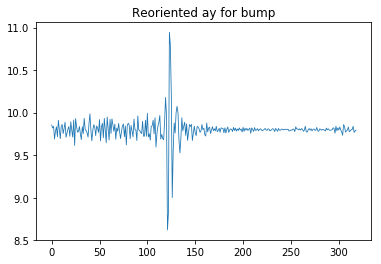

In [4]:
(dataBump.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay for bump')

Text(0.5,1,'Reoriented ax for bump')

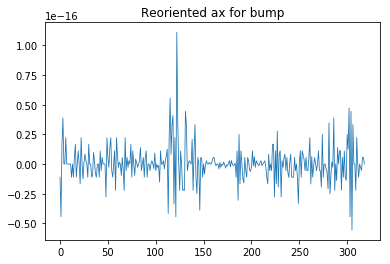

In [5]:
(dataBump.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax for bump')

Text(0.5,1,'Raw ay for bump')

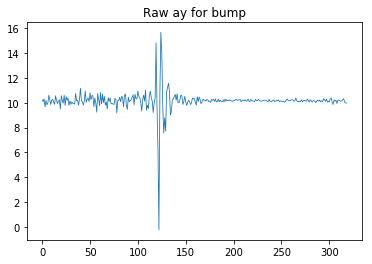

In [6]:
(dataBump.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay for bump')

Text(0.5,1,'Raw ax for bump')

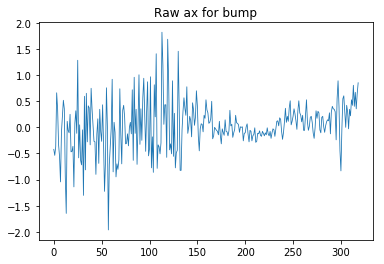

In [7]:
(dataBump.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax for bump')

In [8]:
bumpFeatures = ['acceY', 'acceY_raw','acceX','acceX_raw',]
dataBump = dataBump[bumpFeatures]
dataBump.head()

,acceY,acceY_raw,acceX,acceX_raw
0,9.854396,10.228029,-1.110223e-17,-0.421379
1,9.820303,10.093954,-4.440892e-17,-0.536301
2,9.837924,10.333375,1.665335e-17,-0.373495
3,9.690441,9.672575,3.885781e-17,0.660800
4,9.784677,10.189722,0.000000e+00,0.344765


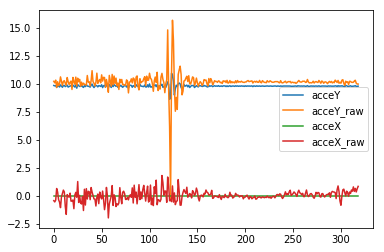

In [9]:
dataBump.plot()

In [10]:
dataBump = dataBump.diff()
dataBump.head()

,acceY,acceY_raw,acceX,acceX_raw
0,NaN,NaN,NaN,NaN
1,-0.034093,-0.134075,-3.330669e-17,-0.114922
2,0.017621,0.239421,6.106227e-17,0.162806
3,-0.147483,-0.660800,2.220446e-17,1.034295
4,0.094236,0.517147,-3.885781e-17,-0.316035


Text(0.5,1,'Reoriented ay first derivative for bump')

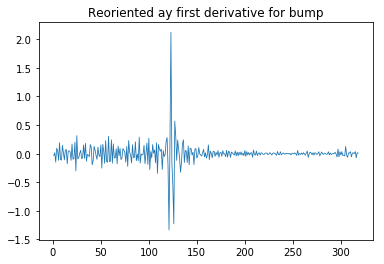

In [11]:
(dataBump.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay first derivative for bump')

Text(0.5,1,'Reoriented ax first derivative for bump')

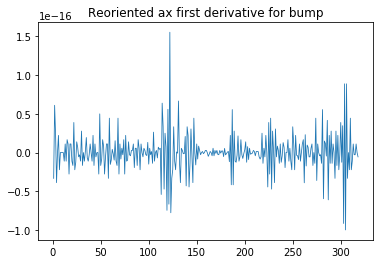

In [12]:
(dataBump.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax first derivative for bump')

Text(0.5,1,'Raw ay first derivative for bump')

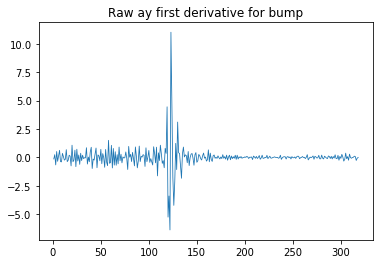

In [13]:
(dataBump.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay first derivative for bump')

Text(0.5,1,'Raw ax first derivative for bump')

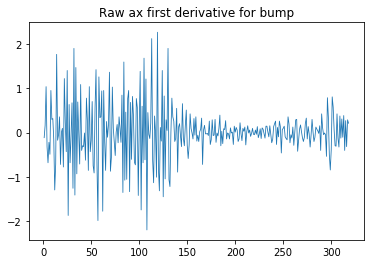

In [14]:
(dataBump.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax first derivative for bump')

In [15]:
dataBump = dataBump.diff()
dataBump.head()

,acceY,acceY_raw,acceX,acceX_raw
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,0.051715,0.373496,9.436896e-17,0.277727
3,-0.165104,-0.900221,-3.885781e-17,0.871489
4,0.241719,1.177947,-6.106227e-17,-1.350330


Text(0.5,1,'Reoriented ay second derivative for bump')

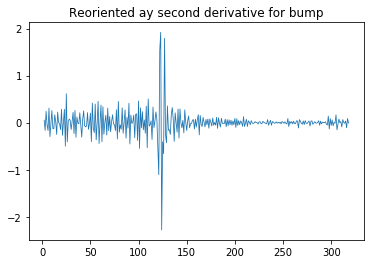

In [16]:
(dataBump.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay second derivative for bump')

Text(0.5,1,'Reoriented ax second derivative for bump')

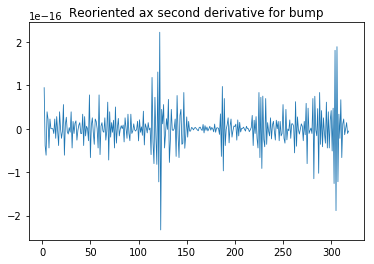

In [17]:
(dataBump.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax second derivative for bump')

Text(0.5,1,'Raw ay second derivative for bump')

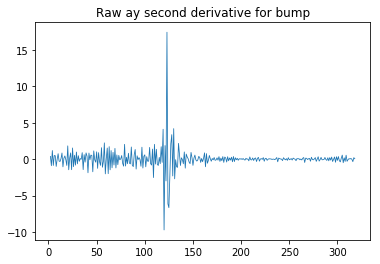

In [18]:
(dataBump.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay second derivative for bump')

Text(0.5,1,'Raw ax second derivative for bump')

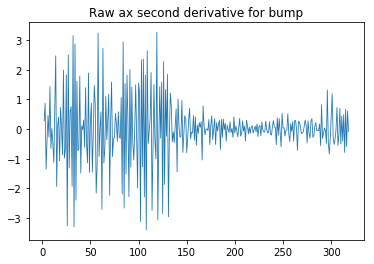

In [19]:
(dataBump.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax second derivative for bump')

In [20]:
file_name_bump= "bump1.json"
dataBump = pd.read_json(file_name_bump)
bumpFeatures = ['acceY', 'acceY_raw','acceX','acceX_raw',]
dataBump = dataBump[bumpFeatures]
dataBump.head()

,acceY,acceY_raw,acceX,acceX_raw
0,9.854396,10.228029,-1.110223e-17,-0.421379
1,9.820303,10.093954,-4.440892e-17,-0.536301
2,9.837924,10.333375,1.665335e-17,-0.373495
3,9.690441,9.672575,3.885781e-17,0.660800
4,9.784677,10.189722,0.000000e+00,0.344765


In [21]:
dataBump = fft(dataBump)
dataBump.shape

(319, 4)

In [22]:
dataBump = pd.DataFrame(dataBump)
dataBump.head()

,0,1,2,3
0,(19.66104578601074+0j),(9.854396286010742-10.6494085j),(0.04774678601074278+0j),(9.854396286010742+10.6494085j)
1,(19.377955648815917+0j),(9.820302848815917-10.6302552j),(0.26265004881591736+0j),(9.820302848815917+10.6302552j)
2,(19.797803734335936+0j),(9.837924194335937-10.706870460000001j),(-0.12195534566406252+0j),(9.837924194335937+10.706870460000001j)
3,(20.023816022326663+0j),(9.690441322326661-9.0117753j),(-0.642933377673339+0j),(9.690441322326661+9.0117753j)
4,(20.31916416402344+0j),(9.78467712402344-9.84495696j),(-0.7498099159765594+0j),(9.78467712402344+9.84495696j)


In [23]:
dataBump['acceY'] = dataBump[0]
dataBump['acceY_raw'] = dataBump[1]
dataBump['acceX'] = dataBump[2]
dataBump['acceX_raw'] = dataBump[3]
dataBump.head()

,0,1,2,3,acceY,acceY_raw,acceX,acceX_raw
0,(19.66104578601074+0j),(9.854396286010742-10.6494085j),(0.04774678601074278+0j),(9.854396286010742+10.6494085j),(19.66104578601074+0j),(9.854396286010742-10.6494085j),(0.04774678601074278+0j),(9.854396286010742+10.6494085j)
1,(19.377955648815917+0j),(9.820302848815917-10.6302552j),(0.26265004881591736+0j),(9.820302848815917+10.6302552j),(19.377955648815917+0j),(9.820302848815917-10.6302552j),(0.26265004881591736+0j),(9.820302848815917+10.6302552j)
2,(19.797803734335936+0j),(9.837924194335937-10.706870460000001j),(-0.12195534566406252+0j),(9.837924194335937+10.706870460000001j),(19.797803734335936+0j),(9.837924194335937-10.706870460000001j),(-0.12195534566406252+0j),(9.837924194335937+10.706870460000001j)
3,(20.023816022326663+0j),(9.690441322326661-9.0117753j),(-0.642933377673339+0j),(9.690441322326661+9.0117753j),(20.023816022326663+0j),(9.690441322326661-9.0117753j),(-0.642933377673339+0j),(9.690441322326661+9.0117753j)
4,(20.31916416402344+0j),(9.78467712402344-9.84495696j),(-0.7498099159765594+0j),(9.78467712402344+9.84495696j),(20.31916416402344+0j),(9.78467712402344-9.84495696j),(-0.7498099159765594+0j),(9.78467712402344+9.84495696j)


In [24]:
bumpFeatures = ['acceY', 'acceY_raw','acceX','acceX_raw',]
dataBump = dataBump[bumpFeatures]
dataBump.head()

,acceY,acceY_raw,acceX,acceX_raw
0,(19.66104578601074+0j),(9.854396286010742-10.6494085j),(0.04774678601074278+0j),(9.854396286010742+10.6494085j)
1,(19.377955648815917+0j),(9.820302848815917-10.6302552j),(0.26265004881591736+0j),(9.820302848815917+10.6302552j)
2,(19.797803734335936+0j),(9.837924194335937-10.706870460000001j),(-0.12195534566406252+0j),(9.837924194335937+10.706870460000001j)
3,(20.023816022326663+0j),(9.690441322326661-9.0117753j),(-0.642933377673339+0j),(9.690441322326661+9.0117753j)
4,(20.31916416402344+0j),(9.78467712402344-9.84495696j),(-0.7498099159765594+0j),(9.78467712402344+9.84495696j)


In [25]:
dataBump.describe()

,acceY,acceY_raw,acceX,acceX_raw
count,(319+0j),(319+0j),(319+0j),(319+0j)
mean,(19.985722214610092+0j),(9.800773350048962-10.13481323224138j),(-0.38417551451216575+0j),(9.800773350048962+10.13481323224138j)
std,(1.158226698347314+0j),(0.9104938396514618+0j),(0.9700291395233387+0j),(0.9104938396514618+0j)
min,(8.276904604428786+0j),(8.621286621093752-6.5888433j),(-6.321979624450686+0j),(8.621286621093752+6.5888433j)
25%,(19.7409170799939+0j),(9.77605791091919-9.86889896j),(-0.6961795387426752+0j),(9.77605791091919+9.86889896j)
50%,(19.980528572561035+0j),(9.800383071899414-10.31422068j),(-0.3812948201835926+0j),(9.800383071899414+9.33738624j)
75%,(20.32280334176636+0j),(9.831028900146485-10.175356935j),(-0.1491528311401371+0j),(9.831028900146485+10.175356935j)
max,(27.35658554791504+0j),(10.945386112928393-11.30063174j),(9.368660564428787+0j),(10.945386112928393+11.30063174j)


C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Reoriented ay fast fourier transform for bump(real part)')

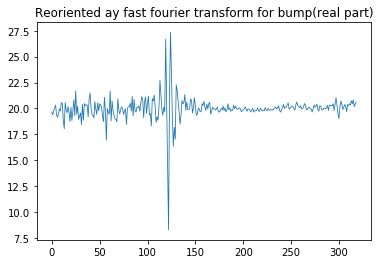

In [26]:
(dataBump.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay fast fourier transform for bump(real part)')

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Reoriented ax fast fourier transform for bump (real part)')

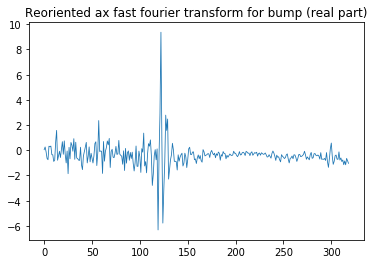

In [27]:
(dataBump.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax fast fourier transform for bump (real part)')

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Raw ay fast fourier transform for bump (real part)')

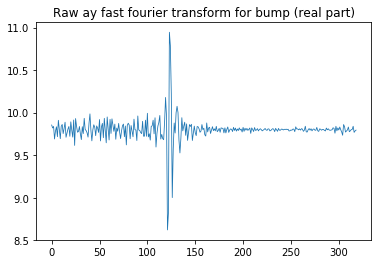

In [28]:
(dataBump.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay fast fourier transform for bump (real part)')

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Raw ax fast fourier transform for bump(real part)')

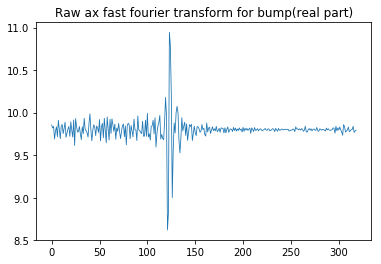

In [29]:
(dataBump.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax fast fourier transform for bump(real part)')

In [30]:
dataBump = np.imag(dataBump)
dataBump.shape

(319, 4)

In [31]:
dataBump = pd.DataFrame(dataBump)
dataBump.head()

,0,1,2,3
0,0.0,-10.649408,0.0,10.649408
1,0.0,-10.630255,0.0,10.630255
2,0.0,-10.706870,0.0,10.706870
3,0.0,-9.011775,0.0,9.011775
4,0.0,-9.844957,0.0,9.844957


In [32]:
dataBump['acceY'] = dataBump[0]
dataBump['acceY_raw'] = dataBump[1]
dataBump['acceX'] = dataBump[2]
dataBump['acceX_raw'] = dataBump[3]
dataBump.head()

,0,1,2,3,acceY,acceY_raw,acceX,acceX_raw
0,0.0,-10.649408,0.0,10.649408,0.0,-10.649408,0.0,10.649408
1,0.0,-10.630255,0.0,10.630255,0.0,-10.630255,0.0,10.630255
2,0.0,-10.706870,0.0,10.706870,0.0,-10.706870,0.0,10.706870
3,0.0,-9.011775,0.0,9.011775,0.0,-9.011775,0.0,9.011775
4,0.0,-9.844957,0.0,9.844957,0.0,-9.844957,0.0,9.844957


In [33]:
bumpFeatures = ['acceY', 'acceY_raw','acceX','acceX_raw',]
dataBump = dataBump[bumpFeatures]
dataBump.head()

,acceY,acceY_raw,acceX,acceX_raw
0,0.0,-10.649408,0.0,10.649408
1,0.0,-10.630255,0.0,10.630255
2,0.0,-10.706870,0.0,10.706870
3,0.0,-9.011775,0.0,9.011775
4,0.0,-9.844957,0.0,9.844957


Text(0.5,1,'Reoriented ay fast fourier transform for bump(imaginary part)')

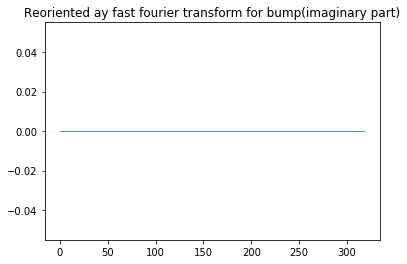

In [34]:
(dataBump.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay fast fourier transform for bump(imaginary part)')

Text(0.5,1,'Reoriented ax fast fourier transform for bump (imaginary part)')

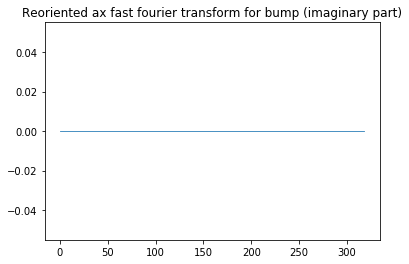

In [35]:
(dataBump.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax fast fourier transform for bump (imaginary part)')

Text(0.5,1,'Raw ay fast fourier transform for bump (imaginary part)')

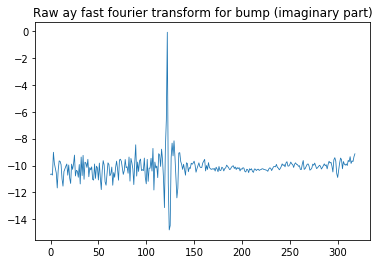

In [36]:
(dataBump.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay fast fourier transform for bump (imaginary part)')

Text(0.5,1,'Raw ax fast fourier transform for bump(imaginary part)')

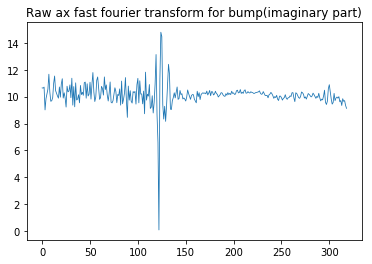

In [37]:
(dataBump.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax fast fourier transform for bump(imaginary part)')

# Potholes

In [38]:
file_name_pothole= "j7thalala2leftsidepothole2wheel.json"
dataPothole = pd.read_json(file_name_pothole)

potholeFeatures = ['acceY', 'acceY_raw','acceX','acceX_raw',]
dataPothole = dataPothole[potholeFeatures]
dataPothole.head(5)

,acceY,acceY_raw,acceX,acceX_raw
0,9.861483,9.854534,-1.110223e-17,0.143652
1,9.841468,9.993398,5.551115e-18,0.986411
2,9.751110,9.713276,5.551115e-18,0.423774
3,9.763321,9.797073,1.110223e-17,0.105345
4,9.808619,9.728839,-1.110223e-17,0.577003


Text(0.5,1,'Reoriented ay for pothole')

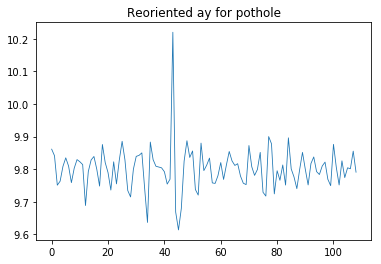

In [39]:
(dataPothole.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay for pothole')

Text(0.5,1,'Reoriented ax for pothole')

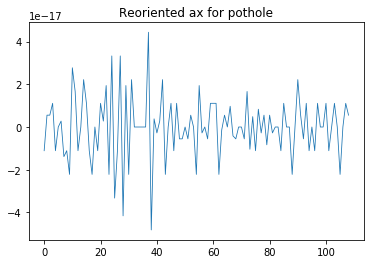

In [40]:
(dataPothole.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax for pothole')

Text(0.5,1,'Raw ay for pothole')

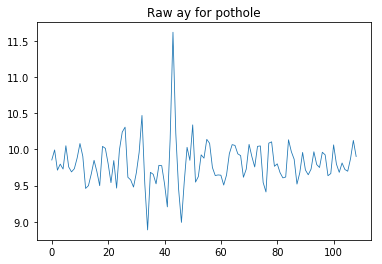

In [41]:
(dataPothole.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay for pothole')

Text(0.5,1,'Raw ax for pothole')

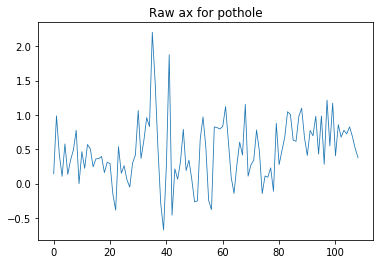

In [43]:
(dataPothole.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax for pothole')

In [44]:
dataPothole = dataPothole.diff()
dataPothole.head()

,acceY,acceY_raw,acceX,acceX_raw
0,NaN,NaN,NaN,NaN
1,-0.020016,0.138864,1.665335e-17,0.842759
2,-0.090357,-0.280122,-7.703720e-34,-0.562637
3,0.012210,0.083797,5.551115e-18,-0.318429
4,0.045298,-0.068234,-2.220446e-17,0.471658


Text(0.5,1,'Reoriented ay first derivative for pothole')

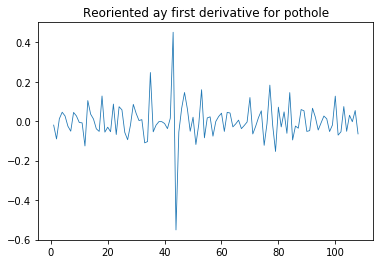

In [45]:
(dataPothole.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay first derivative for pothole')

Text(0.5,1,'Reoriented ax first derivative for pothole')

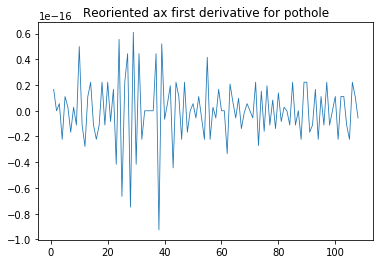

In [46]:
(dataPothole.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax first derivative for pothole')

Text(0.5,1,'Raw ay first derivative for pothole')

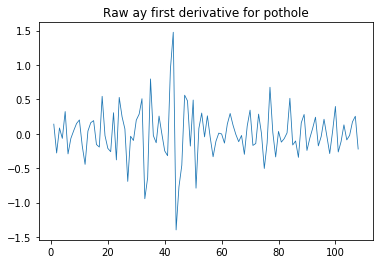

In [47]:
(dataPothole.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay first derivative for pothole')

Text(0.5,1,'Raw ax first derivative for pothole')

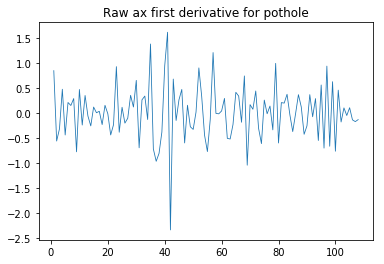

In [48]:
(dataPothole.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax first derivative for pothole')

In [49]:
dataPothole = dataPothole.diff()
dataPothole.head()

,acceY,acceY_raw,acceX,acceX_raw
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,-0.070342,-0.418986,-1.665335e-17,-1.405396
3,0.102568,0.363919,5.551115e-18,0.244209
4,0.033088,-0.152031,-2.775558e-17,0.790087


Text(0.5,1,'Reoriented ay second derivative for pothole')

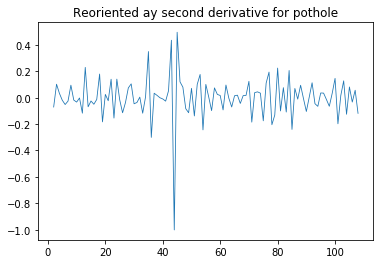

In [50]:
(dataPothole.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay second derivative for pothole')

Text(0.5,1,'Reoriented ax second derivative for pothole')

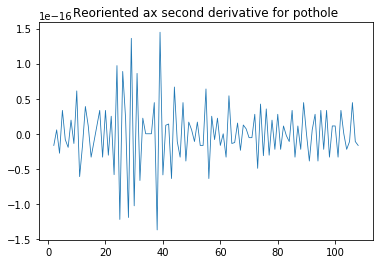

In [51]:
(dataPothole.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax second derivative for pothole')

Text(0.5,1,'Raw ay second derivative for pothole')

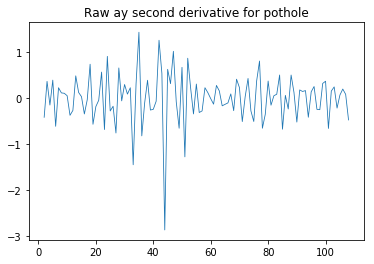

In [52]:
(dataPothole.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay second derivative for pothole')

Text(0.5,1,'Raw ax second derivative for pothole')

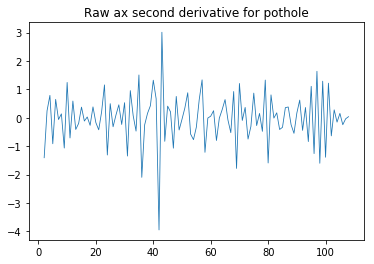

In [53]:
(dataPothole.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax second derivative for pothole')

In [54]:
file_name_pothole= "j7thalala2leftsidepothole2wheel.json"
dataPothole = pd.read_json(file_name_pothole)
potholeFeatures = ['acceY', 'acceY_raw','acceX','acceX_raw',]
dataPothole = dataPothole[potholeFeatures]
dataPothole.head()

,acceY,acceY_raw,acceX,acceX_raw
0,9.861483,9.854534,-1.110223e-17,0.143652
1,9.841468,9.993398,5.551115e-18,0.986411
2,9.751110,9.713276,5.551115e-18,0.423774
3,9.763321,9.797073,1.110223e-17,0.105345
4,9.808619,9.728839,-1.110223e-17,0.577003


In [55]:
dataPothole = fft(dataPothole)
dataPothole = pd.DataFrame(dataPothole)
dataPothole.head()

,0,1,2,3
0,(19.859669216149904+0j),(9.861483116149902-9.710881899999999j),(-0.13670298385009794+0j),(9.861483116149902+9.710881899999999j)
1,(20.82127669033203+0j),(9.841467590332032-9.0069869j),(-1.138341509667967+0j),(9.841467590332032+9.0069869j)
2,(19.888160082080077+0j),(9.751110382080078-9.2895023j),(-0.385939317919922+0j),(9.751110382080078+9.2895023j)
3,(19.665738726557617+0j),(9.763320846557617-9.691728119999999j),(-0.13909703344238267+0j),(9.763320846557617+9.691728119999999j)
4,(20.11446071773682+0j),(9.808619117736818-9.1518364j),(-0.497222482263183+0j),(9.808619117736818+9.1518364j)


In [56]:
dataPothole['acceY'] = dataPothole[0]
dataPothole['acceY_raw'] = dataPothole[1]
dataPothole['acceX'] = dataPothole[2]
dataPothole['acceX_raw'] = dataPothole[3]
dataPothole.head()

,0,1,2,3,acceY,acceY_raw,acceX,acceX_raw
0,(19.859669216149904+0j),(9.861483116149902-9.710881899999999j),(-0.13670298385009794+0j),(9.861483116149902+9.710881899999999j),(19.859669216149904+0j),(9.861483116149902-9.710881899999999j),(-0.13670298385009794+0j),(9.861483116149902+9.710881899999999j)
1,(20.82127669033203+0j),(9.841467590332032-9.0069869j),(-1.138341509667967+0j),(9.841467590332032+9.0069869j),(20.82127669033203+0j),(9.841467590332032-9.0069869j),(-1.138341509667967+0j),(9.841467590332032+9.0069869j)
2,(19.888160082080077+0j),(9.751110382080078-9.2895023j),(-0.385939317919922+0j),(9.751110382080078+9.2895023j),(19.888160082080077+0j),(9.751110382080078-9.2895023j),(-0.385939317919922+0j),(9.751110382080078+9.2895023j)
3,(19.665738726557617+0j),(9.763320846557617-9.691728119999999j),(-0.13909703344238267+0j),(9.763320846557617+9.691728119999999j),(19.665738726557617+0j),(9.763320846557617-9.691728119999999j),(-0.13909703344238267+0j),(9.763320846557617+9.691728119999999j)
4,(20.11446071773682+0j),(9.808619117736818-9.1518364j),(-0.497222482263183+0j),(9.808619117736818+9.1518364j),(20.11446071773682+0j),(9.808619117736818-9.1518364j),(-0.497222482263183+0j),(9.808619117736818+9.1518364j)


In [57]:
potholeFeatures = ['acceY', 'acceY_raw','acceX','acceX_raw',]
dataPothole = dataPothole[potholeFeatures]
dataPothole.head()

,acceY,acceY_raw,acceX,acceX_raw
0,(19.859669216149904+0j),(9.861483116149902-9.710881899999999j),(-0.13670298385009794+0j),(9.861483116149902+9.710881899999999j)
1,(20.82127669033203+0j),(9.841467590332032-9.0069869j),(-1.138341509667967+0j),(9.841467590332032+9.0069869j)
2,(19.888160082080077+0j),(9.751110382080078-9.2895023j),(-0.385939317919922+0j),(9.751110382080078+9.2895023j)
3,(19.665738726557617+0j),(9.763320846557617-9.691728119999999j),(-0.13909703344238267+0j),(9.763320846557617+9.691728119999999j)
4,(20.11446071773682+0j),(9.808619117736818-9.1518364j),(-0.497222482263183+0j),(9.808619117736818+9.1518364j)


C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Reoriented ay fast fourier transform for pothole(real part)')

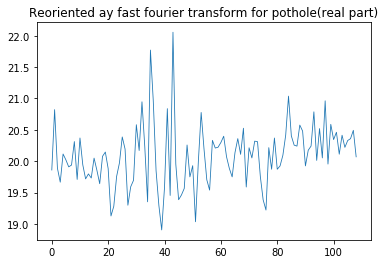

In [58]:
(dataPothole.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay fast fourier transform for pothole(real part)')

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Reoriented ax fast fourier transform for pothole(real part)')

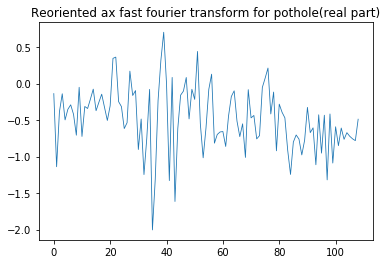

In [59]:
(dataPothole.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax fast fourier transform for pothole(real part)')

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Raw ay fast fourier transform for pothole(real part)')

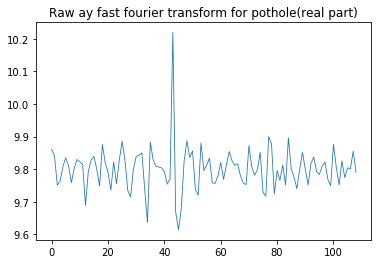

In [60]:
(dataPothole.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay fast fourier transform for pothole(real part)')

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Raw ax fast fourier transform for pothole(real part)')

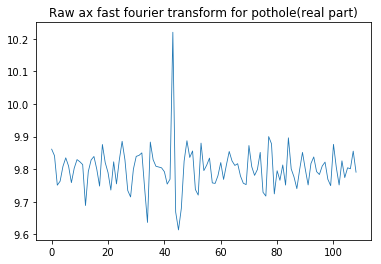

In [61]:
(dataPothole.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax fast fourier transform for pothole(real part)')

In [62]:
dataPothole = np.imag(dataPothole)
dataPothole = pd.DataFrame(dataPothole)
dataPothole.head()

,0,1,2,3
0,0.0,-9.710882,0.0,9.710882
1,0.0,-9.006987,0.0,9.006987
2,0.0,-9.289502,0.0,9.289502
3,0.0,-9.691728,0.0,9.691728
4,0.0,-9.151836,0.0,9.151836


In [63]:
dataPothole['acceY'] = dataPothole[0]
dataPothole['acceY_raw'] = dataPothole[1]
dataPothole['acceX'] = dataPothole[2]
dataPothole['acceX_raw'] = dataPothole[3]
dataPothole.head()

,0,1,2,3,acceY,acceY_raw,acceX,acceX_raw
0,0.0,-9.710882,0.0,9.710882,0.0,-9.710882,0.0,9.710882
1,0.0,-9.006987,0.0,9.006987,0.0,-9.006987,0.0,9.006987
2,0.0,-9.289502,0.0,9.289502,0.0,-9.289502,0.0,9.289502
3,0.0,-9.691728,0.0,9.691728,0.0,-9.691728,0.0,9.691728
4,0.0,-9.151836,0.0,9.151836,0.0,-9.151836,0.0,9.151836


In [64]:
potholeFeatures = ['acceY', 'acceY_raw','acceX','acceX_raw',]
dataPothole = dataPothole[potholeFeatures]
dataPothole.head()

,acceY,acceY_raw,acceX,acceX_raw
0,0.0,-9.710882,0.0,9.710882
1,0.0,-9.006987,0.0,9.006987
2,0.0,-9.289502,0.0,9.289502
3,0.0,-9.691728,0.0,9.691728
4,0.0,-9.151836,0.0,9.151836


Text(0.5,1,'Reoriented ay fast fourier transform for pothole(imaginary part)')

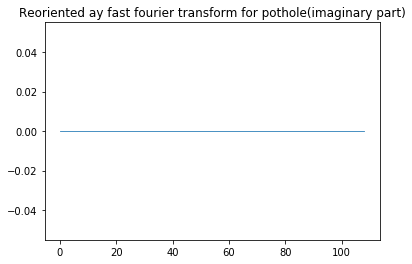

In [65]:
(dataPothole.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay fast fourier transform for pothole(imaginary part)')

Text(0.5,1,'Reoriented ax fast fourier transform for pothole(imaginary part)')

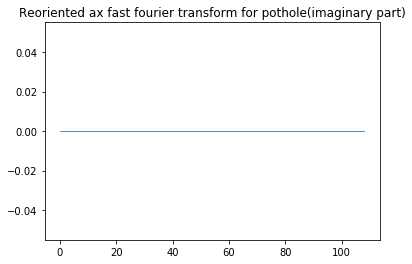

In [66]:
(dataPothole.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax fast fourier transform for pothole(imaginary part)')

Text(0.5,1,'Raw ay fast fourier transform for pothole(imaginary part)')

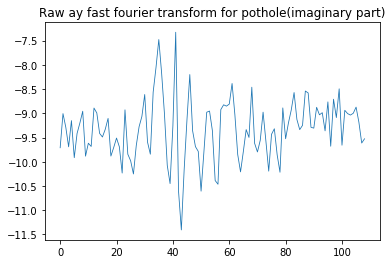

In [67]:
(dataPothole.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay fast fourier transform for pothole(imaginary part)')

Text(0.5,1,'Raw ax fast fourier transform for pothole(imaginary part)')

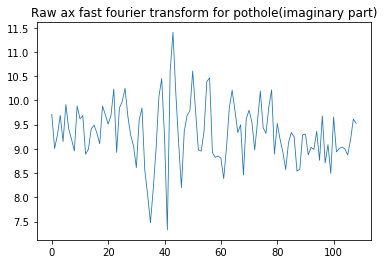

In [68]:
(dataPothole.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax fast fourier transform for pothole(imaginary part)')